<a href="https://colab.research.google.com/github/thinhtaungam/Github_tutorial/blob/master/FuzzyLogicLab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So nguoi bi nhiem: 80000
Tong so tu vong: 8000
Muc do tiep giap (1: Khong,2: Co,3: Gian tiep): 2
So nguoi nhiem 80000, tu vong 8000; tiep giap cap do 2. Kha nang lay lan cap do 9


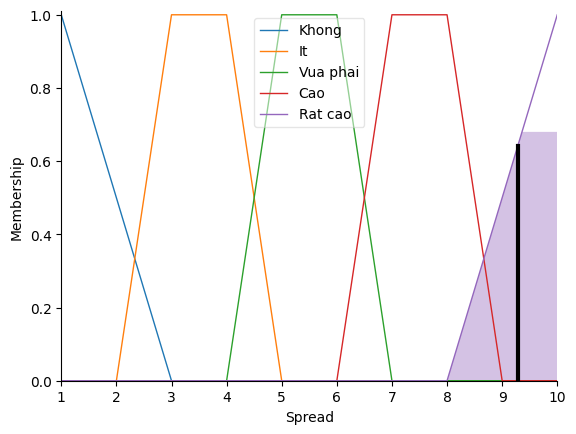

In [34]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

Xc = np.arange(1,100001) # So nguoi nhiem benh
Xd = np.arange(1,10001) # So nguoi da tu vong
Xb = [1,2,3] # Muc do tiep giap
Xs = np.arange(1,11) # Muc do lay lan

# Dinh nghia cac tien de va ket luan dua tren cac bien ngon ngu
C = ctrl.Antecedent(Xc,"Cases") # Cac truong hop
D = ctrl.Antecedent(Xd,"Death") # Tu vong
B = ctrl.Antecedent(Xb,"Border") # muc do tiep xuc
S = ctrl.Consequent(Xs,"Spread") # Muc do lay lan

C["It"] = fuzz.zmf(C.universe,1000,10000)
C["Trung binh"] = fuzz.pimf(C.universe,3000,10000,20000,60000)
C["Nhieu"] = fuzz.gbellmf(C.universe,8000,3,70000)
C["Rat nhieu"] = fuzz.smf(C.universe,65000,90000)

D["It"] = fuzz.trapmf(D.universe,[1,1,200,500])
D["Trung binh"] = fuzz.trapmf(D.universe,[300,1000,2000,6000])
D["Nhieu"] = fuzz.trapmf(D.universe,[5000,6000,7000,8000])
D["Rat nhieu"] = fuzz.trapmf(D.universe,[7500,8000,10000,10000])

B["Khong"] = fuzz.trimf(B.universe,[1,1,2])
B["Co"] = fuzz.trimf(B.universe,[1,2,3])
B["Gian tiep"] = fuzz.trimf(B.universe,[2,3,3])

S["Khong"] = fuzz.trimf(S.universe,[1,1,3])
S["It"] = fuzz.trapmf(S.universe,[2,3,4,5])
S["Vua phai"] = fuzz.trapmf(S.universe,[4,5,6,7])
S["Cao"] = fuzz.trapmf(S.universe,[6,7,8,9])
S["Rat cao"] = fuzz.trimf(S.universe,[8,10,10])

R1         = ctrl.Rule( C["It"] & D["It"] & (B["Khong"]), S["Khong"] )
R2         = ctrl.Rule( C["It"] & D["It"] & (B["Co"]), S["It"] )
R3         = ctrl.Rule( C["It"] & D["It"] & (B["Gian tiep"]), S["Khong"] )
R4         = ctrl.Rule( C["It"] & D["Trung binh"] & (B ["Khong"]), S["Khong"] )
R5_6       = ctrl.Rule( C["It"] & D["Trung binh"] & (B["Co"] | B["Gian tiep"]), S["It"] )
R7_8_9     = ctrl.Rule( C["It"] & D["Nhieu"] & (B["Khong"] | B["Co"] | B["Gian tiep"]), S["Vua phai"] )
R10_11_12  = ctrl.Rule( C["It"] & D["Rat nhieu"] & (B["Khong"] | B["Co"] | B["Gian tiep"]), S["Vua phai"])
R13        = ctrl.Rule( C["Trung binh"] & D["It"] & (B["Khong"]), S["Khong"] )
R14_15     = ctrl.Rule( C["Trung binh"] & D["It"] & (B["Co"] | B["Gian tiep"]), S["It"] )
R16        = ctrl.Rule( C["Trung binh"] & D["Trung binh"] & (B["Khong"]), S["It"] )
R17_18     = ctrl.Rule( C["Trung binh"] & D["Trung binh"] & (B["Co"] | B["Gian tiep"]), S["Vua phai"] )
R19        = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Khong"]), S["Vua phai"] )
R20        = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Co"]), S["Cao"] )
R21        = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Gian tiep"]), S["It"] )
R22        = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Khong"]), S["Vua phai"] )
R23        = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Co"]), S["Cao"] )
R24        = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Vua phai"] )
R25_26     = ctrl.Rule( C["Nhieu"] & D["It"] & (B["Khong"] | B["Co"]), S["Vua phai"] )
R27        = ctrl.Rule( C["Nhieu"] & D["It"] & (B["Gian tiep"]), S["It"] )
R28        = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Khong"]), S["Vua phai"] )
R29        = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Co"]), S["Cao"] )
R30        = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Gian tiep"]), S["It"] )
R31        = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Khong"]), S["It"] )
R32        = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Co"]), S["Cao"] )
R33        = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Gian tiep"]), S["Vua phai"] )
R34        = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Khong"]), S["Cao"] )
R35        = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Co"]), S["Rat cao"] )
R36        = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Cao"] )
R37_38_39   = ctrl.Rule( C["Rat nhieu"] & D["It"] & (B["Khong"] | B["Co"] | B["Gian tiep"]), S["Vua phai"])
R40        = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Khong"]), S["Vua phai"] )
R41        = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Co"]), S["Cao" ] )
R42        = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Gian tiep"]), S["Vua phai"] )
R43        = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Khong"]), S["Cao"] )
R44        = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Co"]), S["Rat cao"] )
R45        = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Gian tiep"]), S["Cao"] )
R46        = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Khong"]), S["Cao"] )
R47        = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Co"]), S["Rat cao"] )
R48        = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Cao"] )
rules = [R1,R2,R3,R4,R5_6,R7_8_9,R10_11_12,R13,R14_15,R16,R17_18,
         R19,R20,R21,R22,R23,R24,R25_26,R27,R28,R29,R30,R31,R32,R33,
         R34,R35,R36,R37_38_39,R40,R41,R42,R43,R44,R45,R46,R47,R48]

system = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))

iC = int(input("So nguoi bi nhiem: "))
iD = int(input("Tong so tu vong: "))
iB = int(input("Muc do tiep giap (1: Khong,2: Co,3: Gian tiep): "))

system.input["Cases"] = iC
system.input["Death"] = iD
system.input["Border"] = iB

system.compute()
oS = system.output["Spread"]
print("So nguoi nhiem %d, tu vong %d; tiep giap cap do %d. Kha nang lay lan cap do %d" % (iC,iD,iB,oS))
S.view(system)
